In [ ]:
import numpy as np

import matplotlib.pyplot as plt
# Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.pink()

import pandas as pd
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge 
from sklearn.metrics import r2_score, mean_absolute_error

<Figure size 720x540 with 0 Axes>

In [ ]:
data_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
data_test = pd.read_csv("/content/sample_data/california_housing_test.csv")

print(data_train.shape, data_test.shape)

(17000, 9) (3000, 9)


In [ ]:
dataframe = pd.merge(data_train, data_test, how="outer")

In [ ]:
print(dataframe.shape)
dataframe.head()

(20000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
result = dataframe.iloc[215]
result

longitude               -116.4300
latitude                  33.7500
housing_median_age        24.0000
total_rooms             2596.0000
total_bedrooms           438.0000
population               473.0000
households               237.0000
median_income              3.7727
median_house_value    500001.0000
Name: 215, dtype: float64

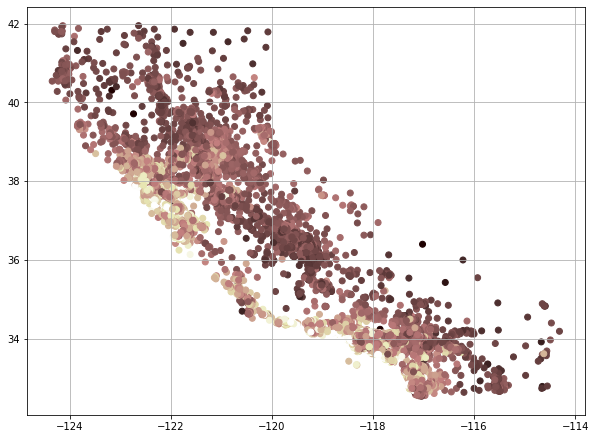

In [ ]:
plt.scatter(dataframe["longitude"], dataframe["latitude"], c=dataframe["median_house_value"])

In [ ]:
print(dataframe.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


In [ ]:
dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-119.566172,35.626750,28.627750,2637.051550,537.991800,1425.557650,499.525450,3.872132,207082.716750
std,2.003609,2.136141,12.582229,2176.314757,420.631119,1131.048487,381.729517,1.900356,115557.055856
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1451.000000,296.000000,788.000000,280.000000,2.562500,119800.000000
50%,-118.490000,34.250000,29.000000,2126.000000,434.000000,1166.000000,409.000000,3.536000,179800.000000
75%,-118.000000,37.710000,37.000000,3149.000000,647.000000,1724.000000,604.000000,4.745325,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
dataframe.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False


In [ ]:
np.array(np.sum(dataframe.isna()))

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
dataframe.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
sales_correlations = dataframe.corr().iloc[-1, :-1]
sales_correlations = sales_correlations.sort_values() 
print(sales_correlations)

latitude             -0.143969
longitude            -0.045788
population           -0.024234
total_bedrooms        0.051111
households            0.066573
housing_median_age    0.104470
total_rooms           0.135298
median_income         0.689109
Name: median_house_value, dtype: float64


In [ ]:
sales_predictors_labels = sales_correlations.axes[0]
print(sales_predictors_labels)

Index(['latitude', 'longitude', 'population', 'total_bedrooms', 'households',
       'housing_median_age', 'total_rooms', 'median_income'],
      dtype='object')


In [ ]:
X = dataframe[sales_predictors_labels]
Y = dataframe[sales_correlations.name]
print(X.shape)
print(Y.shape)

(20000, 8)
(20000,)


In [ ]:
X

,latitude,longitude,population,total_bedrooms,households,housing_median_age,total_rooms,median_income
0,34.19,-114.31,1015.0,1283.0,472.0,15.0,5612.0,1.4936
1,34.40,-114.47,1129.0,1901.0,463.0,19.0,7650.0,1.8200
2,33.69,-114.56,333.0,174.0,117.0,17.0,720.0,1.6509
3,33.64,-114.57,515.0,337.0,226.0,14.0,1501.0,3.1917
4,33.57,-114.57,624.0,326.0,262.0,20.0,1454.0,1.9250
...,...,...,...,...,...,...,...,...
19995,34.42,-119.86,1258.0,642.0,607.0,23.0,1450.0,1.1790
19996,34.06,-118.14,3496.0,1082.0,1036.0,27.0,5257.0,3.3906
19997,36.30,-119.70,693.0,201.0,220.0,10.0,956.0,2.2895
19998,34.10,-117.12,46.0,14.0,14.0,40.0,96.0,3.2708


In [ ]:
Y

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
19995    225000.0
19996    237200.0
19997     62000.0
19998    162500.0
19999    500001.0
Name: median_house_value, Length: 20000, dtype: float64

# Training

In [ ]:
seed=123
test_ratio = 0.3

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=test_ratio, 
                                                    random_state=seed, 
                                                    shuffle=True)

print("Размер выборки для тренировки и кросс-валидации", X_train.shape) 
print("Размер откликов для тренировки и кросс-валидации", Y_train.shape)

Размер выборки для тренировки и кросс-валидации (14000, 8)
Размер откликов для тренировки и кросс-валидации (14000,)


In [ ]:
model_lm = LinearRegression()           # Объект класса
model_lm.fit(X_train, Y_train)          # Метод обучения
print("Coefficients weights: ", model_lm.coef_, "\n")
print("R2 on train sample is", model_lm.score(X_train, Y_train))

Coefficients weights:  [-4.29980517e+04 -4.31979605e+04 -4.31692230e+01  1.09007830e+02
  6.79176557e+01  1.16714553e+03 -8.45638604e+00  4.02344599e+04] 

R2 on train sample is 0.6426707550107638


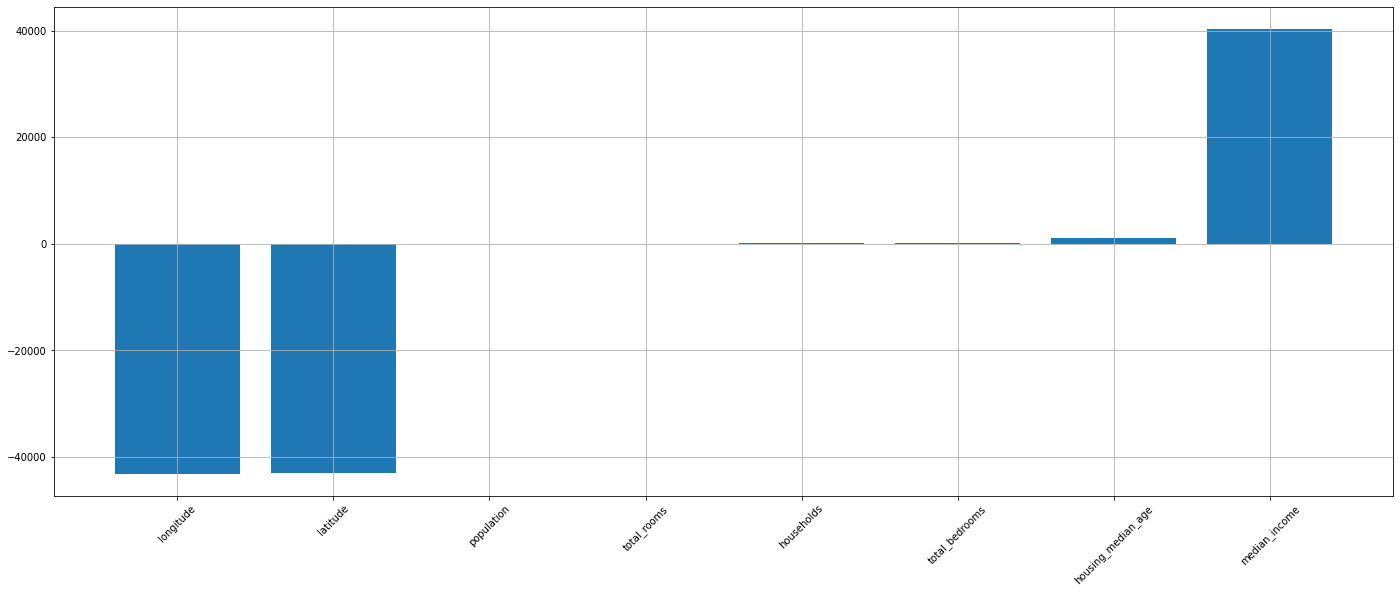

In [ ]:
plt.figure(figsize = (24, 9))
model_coeffs = pd.Series(data = model_lm.coef_, index=sales_predictors_labels)
plt.bar(x = model_coeffs.sort_values().axes[0], height = model_coeffs.sort_values())

ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)

plt.show()

In [ ]:
preds = model_lm.predict(X_test)
R2_real = r2_score(Y_test, preds)
print("R2 on test sample is", R2_real)

R2 on test sample is 0.6263327127411877


In [ ]:
np.max(Y_test)

500001.0

In [ ]:
np.mean(Y_test)

206367.84733333334

In [ ]:
np.min(Y_test)

22500.0

In [ ]:
MAE_real = mean_absolute_error(Y_test, preds)
print(MAE_real)

50889.436776020564


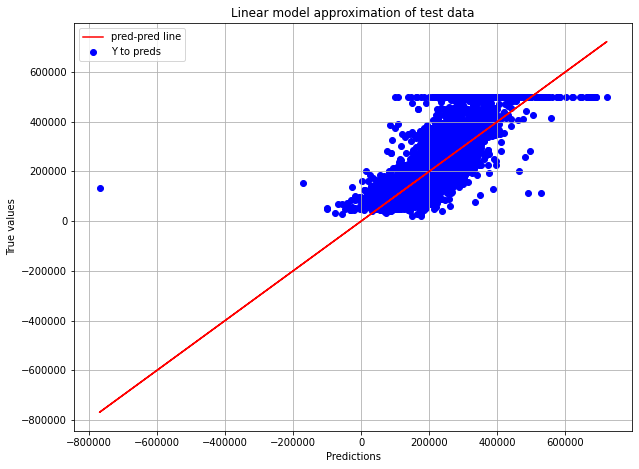

In [ ]:
plt.scatter(preds, Y_test, c = 'b', label = 'Y to preds')
plt.plot(preds, preds, c = 'r', label = 'pred-pred line')
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Linear model approximation of test data")
plt.legend()
plt.show()

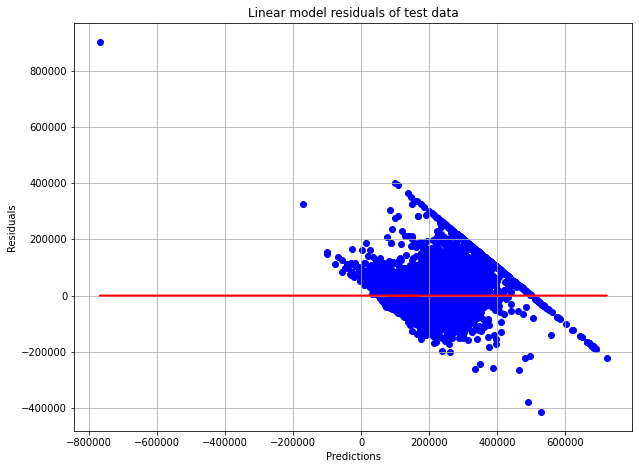

In [ ]:
plt.scatter(preds, Y_test - preds, c = 'b')
plt.plot(preds, np.zeros_like(preds), c = 'r')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Linear model residuals of test data")
plt.show()

# R2 by increasing predictors number

In [ ]:
seed=123
test_ratio = 0.3

r2_history_train = []
r2_history_test = []
pred_names = []
preds_y = []
models = []
predictors = np.arange(1, len(sales_correlations) + 1)

X = dataframe[sales_predictors_labels]
Y = dataframe[sales_correlations.name]
X = X.interpolate(Axis = 1)


for predictor_name in sales_predictors_labels[::-1]:
    pred_names.append(predictor_name)
    X_trace = X[pred_names]

    X_train, X_test, Y_train, Y_test = train_test_split(X_trace, Y, 
                                                    test_size=test_ratio, 
                                                    random_state=seed, 
                                                    shuffle=True)
    model_lm = LinearRegression()
    model_lm.fit(X_train, Y_train)
    
    preds = model_lm.predict(X_test)
    models.append(model_lm)
    
    preds_y.append(preds)
    r2_history_train.append(model_lm.score(X_train, Y_train))
    r2_history_test.append(model_lm.score(X_test, Y_test))

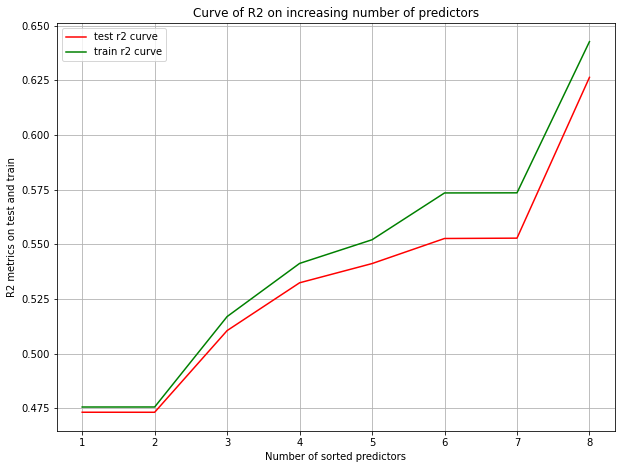

In [ ]:
plt.plot(predictors, r2_history_test, c = "r", label = 'test r2 curve')
plt.plot(predictors, r2_history_train, c = "g", label = 'train r2 curve')
plt.xlabel("Number of sorted predictors")
plt.ylabel("R2 metrics on test and train")
plt.title("Curve of R2 on increasing number of predictors")
plt.legend()

# Lasso model

In [ ]:
model_LASSO_cv = LassoCV(eps = 0.00001, n_alphas = 10000, cv = 4, random_state = seed)
model_LASSO_cv.fit(X_train, Y_train)

LassoCV(cv=4, eps=1e-05, n_alphas=10000, random_state=123)

In [ ]:
model_LASSO_cv.score(X_train, Y_train)

0.6426045038084831

In [ ]:
model_LASSO_cv.score(X_test, Y_test)

0.626283616864642

In [ ]:
lasso_preds = model_LASSO_cv.predict(X_test)
MAE_lasso = mean_absolute_error(Y_test, lasso_preds)
MAE_lasso

50854.761934332106

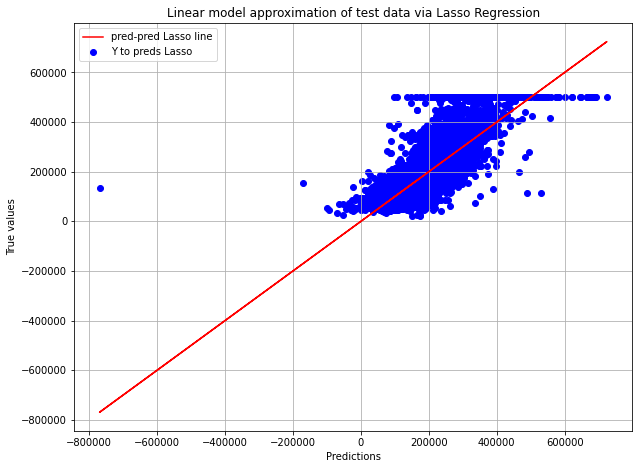

In [ ]:
plt.scatter(lasso_preds, Y_test, c = 'b', label = 'Y to preds Lasso')
plt.plot(lasso_preds, lasso_preds, c = 'r', label = 'pred-pred Lasso line')
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Linear model approximation of test data via Lasso Regression")
plt.legend()
plt.show()

# Ridge model

In [ ]:
model_RIDGE_cv = RidgeCV(alphas = np.linspace(9, 11, 300), cv = 4)
model_RIDGE_cv.fit(X_train, Y_train)
model_RIDGE_cv.best_score_

0.6420037086738245

In [ ]:
model_RIDGE_cv.alpha_

9.0

In [ ]:
model_RIDGE_cv.score(X_train, Y_train)

0.6426703368178867

In [ ]:
model_RIDGE_cv.score(X_test, Y_test)

0.6263342241314569

In [ ]:
ridge_preds = model_RIDGE_cv.predict(X_test)
MAE_ridge = mean_absolute_error(Y_test, ridge_preds)
MAE_ridge

50886.23782500869

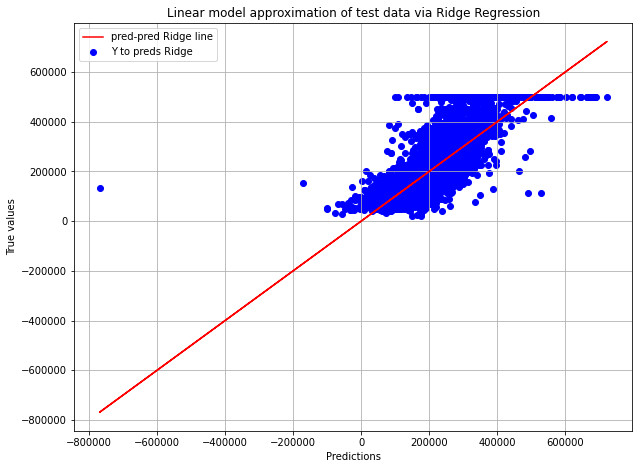

In [ ]:
plt.scatter(ridge_preds, Y_test, c = 'b', label = 'Y to preds Ridge')
plt.plot(ridge_preds, ridge_preds, c = 'r', label = 'pred-pred Ridge line')
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Linear model approximation of test data via Ridge Regression")
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Results

In [ ]:
print("Средняя абсолютная ошибка по линейной модели с числовыми предикторами", MAE_real)
print("Средняя абсолютная ошибка по линейной модели с Lasso и числовыми предикторами", MAE_lasso)
print("Средняя абсолютная ошибка по линейной модели с Ridge и числовыми предикторами", MAE_ridge)

Средняя абсолютная ошибка по линейной модели с числовыми предикторами 50889.436776020564
Средняя абсолютная ошибка по линейной модели с Lasso и числовыми предикторами 50854.761934332106
Средняя абсолютная ошибка по линейной модели с Ridge и числовыми предикторами 50886.23782500869
